# Zgony według tygodni, GUS
## W podziale na województwa, powiaty i 5-letnie grupy wiekowe

Potrzebne funkcje w plikach:
* helper_functions.py
* govpl_function.py

Uwaga: 
...

## TODO
* ...

In [1]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

from share.helper_functions import (
    getfile, 
    unzip, 
    xlsx2xls, 
    display_all
)
from typing import NamedTuple
from share.gus_functions import (
    GUSparams,
    Analysis
    )
# import govpl_functions as govpl
import pandas as pd
import importlib
import glob
import os

In [2]:
data_dir = './gus_data'
img_dir = './images'
url =\
'https://stat.gov.pl/download/gfx/portalinformacyjny/pl/defaultaktualnosci/5468/39/2/1/zgony_wg_tygodni.zip'
zipfile = 'zgony_wg_tygodni.zip'
zipfile_path = os.sep.join([data_dir,zipfile])
zip_dir = os.sep.join([data_dir,'zgony_wg_tygodni'])
file_prefix = 'Zgony wedêug tygodni w Polsce_'
file_prefix_terminal = 'Zgony\ wedêug\ tygodni\ w\ Polsce_'
file_suffix = '.xlsx'
libreoffice_cmd = 'libreoffice7.2'

year_start = 2000
year_end = 2021

mygus = Analysis()

mygus.params = GUSparams(
    data_dir,
    img_dir,
    url,
    zipfile,
    zipfile_path,
    zip_dir,
    file_prefix,
    file_prefix_terminal,
    file_suffix,
    libreoffice_cmd,
    year_start,
    year_end
)

mygus.getdata()


Getting GUS data...
./gus_data/zgony_wg_tygodni.zip exists, so not downloaded
*.xlsx or *.xls files exist in ./gus_data/zgony_wg_tygodni, so zip file not extracted
Converting *.xlsx to *.xls
2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 
Making dictionary of year GUS data frames for each year: year_data_dict {int : pandas.DataFrame}
2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 
Merging GUS data frames from dict in a single data frame: all_years_df
Done.


In [3]:
# %load_ext autoreload
# %autoreload

# from share.helper_functions import (
#     getfile, 
#     unzip, 
#     xlsx2xls, 
#     display_all
# )

In [17]:
# mygus.all_years_df

In [63]:
df = mygus.all_years_df
df_og = df[(df['Wiek zmarłych w latach']=='Ogółem') & (df['NUTS']=='PL')].copy(deep=True)
df_og.reset_index(drop=True, inplace=True)
df_og.drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
df_og = df_og.set_index('Rok').T.reset_index(drop=True)
df_og.index.name = 'Tydzień'

In [64]:
df_og

Rok,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Tydzień,,,,,,,,,,,,,,,,,,,,,
0,7913,7662,6889,8117,7568,7477,7504,7549,8160,8421,...,7557,9309,7533,7984,8215,9279,8372,8668,8463,11470
1,8292,7359,7053,7699,7741,7225,7298,7381,7773,8843,...,7442,9030,7317,7754,7920,10225,8078,8586,8242,10970
2,8970,7232,7286,7442,7648,7374,7425,7242,7851,8794,...,7655,9041,7261,7800,7683,9875,8639,8700,8059,11016
3,9380,7548,7027,7425,7555,7473,7964,7354,7657,9472,...,7368,8938,7463,7559,7977,9946,8793,8798,8015,10388
4,9474,7319,6771,7405,7802,7461,7639,7332,7437,9169,...,7728,8803,7713,7963,7970,10076,8987,9362,8560,9880
5,8591,7469,6844,7613,7972,7688,7403,7636,7588,9141,...,8133,8401,7837,8166,8145,9432,9088,9269,8343,9925
6,7841,7078,6694,7658,7272,7937,7327,7501,7576,8509,...,8258,8159,7584,8873,7928,9221,9128,9241,8624,10116
7,7532,6972,6983,7972,7246,7798,7122,7923,7678,8191,...,7699,7839,7524,8985,7861,9053,9333,8717,8474,9894
8,7526,7303,6879,8276,7260,8057,7079,8323,7862,7869,...,7515,7788,7627,9068,8002,8388,9864,8620,8471,10155


<AxesSubplot:xlabel='Tydzień'>

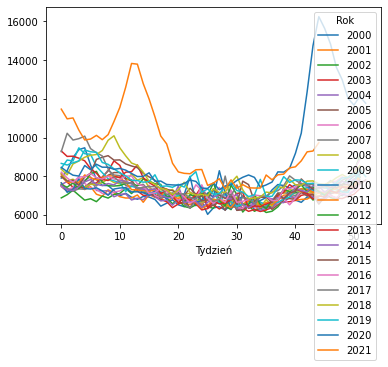

In [65]:
df_og.plot()